In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import community
from collections import defaultdict
import palettable

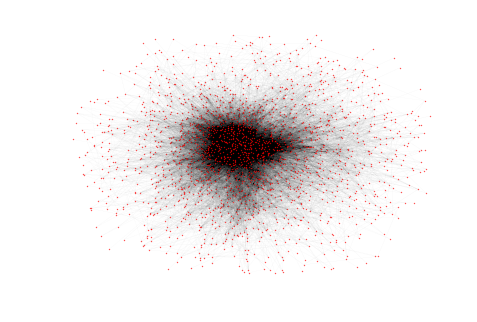

In [2]:
# draw the graph
graph = json.load(open('8.20.5.json'))
G = nx.Graph(graph)
pos=nx.spring_layout(G, k = 0.15, iterations = 20, scale = 10)
nx.draw(G,pos, with_labels = False, node_size = 0.1, width = 0.01)
plt.savefig('graph.png', dpi = 1000)
plt.show()

In [5]:
# get a list of node chosen by TA_more
dic = json.load(open('8.20.5-Kaigoo.json'))
temp = dic["LosAngelesFlakers"]
res = set(temp[0])
for t in temp:
    res = (res | set(t))
res = list(res)

temp = dic["Kaigoo"]
res1 = set(temp[0])
for t in temp:
    res1 = (res1 | set(t))
res1 = list(res1)

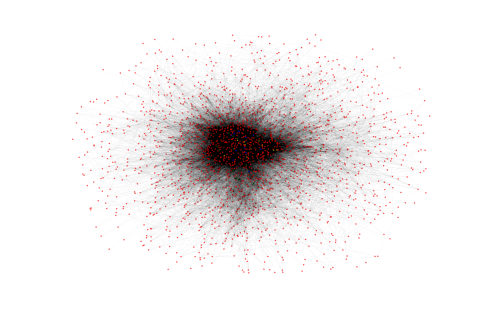

In [6]:
# color the graph
node_color = []
for node in G.nodes:
    if node in res and node in res1:
        node_color.append('y')
    elif node in res:
        node_color.append('b')
    elif node in res1:
        node_color.append('g')
    else:
        node_color.append('r')
nx.draw(G,pos, with_labels = False, node_size = 0.1, width = 0.01, node_color = node_color)
plt.savefig('graph1.png', dpi = 2000)
plt.show()

In [7]:
graphs = list(nx.connected_component_subgraphs(G))
print(len(graphs))

3


In [8]:
partition = community.best_partition(G)
# induced_graph = community.induced_graph(partition, G)
nodes = defaultdict(int)
for node, cluster in partition.items():
    nodes[cluster] += 1
print(nodes)

defaultdict(<class 'int'>, {0: 225, 1: 266, 2: 393, 3: 306, 4: 306, 5: 199, 6: 76, 7: 132, 8: 46, 9: 23, 10: 5, 11: 1, 12: 11, 13: 5, 14: 5, 15: 1})


In [11]:
def visualize(partition, G, filename, nodes, threshold):
    max = 0
    for node, cluster in partition.items():
        if cluster > max:
            max = cluster
    color_bar = palettable.colorbrewer.qualitative.Set1_9.mpl_colors
    
    node_color = []
    for node, cluster in partition.items():
        if nodes[cluster] < threshold*len(G):
            node_color.append((0, 0, 0))
        else:
            node_color.append(color_bar[cluster])

    pos=nx.spring_layout(G, k = 0.15, iterations = 20, scale = 10)
    nx.draw(G, pos, with_labels = False, node_size = 0.1, width = 0.01, node_color = node_color)
    plt.savefig(filename, dpi = 2000)
    plt.show()

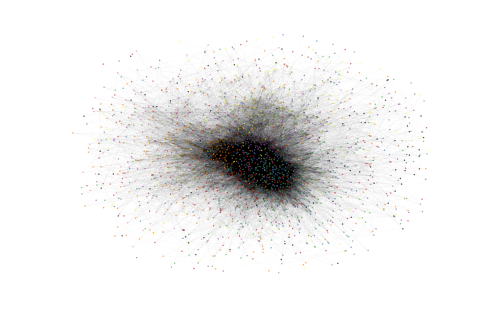

In [12]:
visualize(partition, G, 'graph2.png', nodes, 0.15)

In [22]:
compare_dic = {}
for t in res:
    if partition[t] in compare_dic:
        i = compare_dic[partition[t]][0]
        compare_dic[partition[t]] = (i+1, nodes[partition[t]])
    else:
        compare_dic[partition[t]] = (1, nodes[partition[t]])
print('cluster id: (# nodes picked by winner, # nodes inside cluster):')
print(compare_dic)
print(nodes)

cluster id: (# nodes picked by winner, # nodes inside cluster):
{2: (3, 393), 0: (2, 225), 1: (6, 266), 4: (5, 306), 3: (3, 306), 5: (1, 199)}
defaultdict(<class 'int'>, {0: 225, 1: 266, 2: 393, 3: 306, 4: 306, 5: 199, 6: 76, 7: 132, 8: 46, 9: 23, 10: 5, 11: 1, 12: 11, 13: 5, 14: 5, 15: 1})
